<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [3]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/AD5-W...,Sy kesulitan ingin komplen masalah pembayaran ...,2,76,5.27.2,2022-12-30 03:49:00,None,NaT
1,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/AD5-W...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,48,5.27.3,2023-01-05 15:39:31,None,NaT
2,dbba0eda-bba0-4526-9957-a8e5fe5b128d,ferry kurniawan,https://play-lh.googleusercontent.com/a-/AD5-W...,Saya sebagai penjual ngerasa kurang nyaman. Ke...,1,5,5.27.3,2023-01-10 03:23:47,None,NaT
3,2508beff-a7f5-4aaf-ad4b-3d2eb671f889,Budiman Android16,https://play-lh.googleusercontent.com/a/AEdFTp...,Sistem nya paraaah... seller ingin mengecek pe...,1,400,5.23.1,2022-11-01 09:44:28,None,NaT
4,6f76b437-a1cb-4a9f-946d-53304e238072,asep dadang sudjana,https://play-lh.googleusercontent.com/a-/AD5-W...,"Saya pelanggan setia pengguna bukalapak, sejak...",3,310,5.23.1,2022-11-08 05:37:54,None,NaT


In [5]:
len(df_busu.index) #count the number of data we got

1300

In [6]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,"Tolong saya pake pay later beli barang, ketera..."
1296,java coil,1,2022-08-06 01:31:12,Menu live chat nya mana oi... Banyak yg bingun...
1297,Widi Yanwar,1,2022-08-21 16:18:31,Aplikasi payah... Ketika ad msalah tidak bisa ...
1298,galung wicaksono,3,2022-08-11 00:32:39,"agak bingung, saat delive tidak ada rincian de..."
1299,Muamar Gusti Alif,1,2022-12-26 04:20:02,Gmn caranya cancel pembelian Reksadana terlanj...


In [7]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [8]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,"Tolong saya pake pay later beli barang, ketera..."
1296,java coil,1,2022-08-06 01:31:12,Menu live chat nya mana oi... Banyak yg bingun...
1297,Widi Yanwar,1,2022-08-21 16:18:31,Aplikasi payah... Ketika ad msalah tidak bisa ...
1298,galung wicaksono,3,2022-08-11 00:32:39,"agak bingung, saat delive tidak ada rincian de..."
1299,Muamar Gusti Alif,1,2022-12-26 04:20:02,Gmn caranya cancel pembelian Reksadana terlanj...


In [9]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [10]:
import nltk

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...
1,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
2,ferry kurniawan,1,2023-01-10 03:23:47,Saya sebagai penjual ngerasa kurang nyaman. Ke...
3,Budiman Android16,1,2022-11-01 09:44:28,Sistem nya paraaah... seller ingin mengecek pe...
4,asep dadang sudjana,3,2022-11-08 05:37:54,"Saya pelanggan setia pengguna bukalapak, sejak..."


In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [14]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [15]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [16]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [17]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [18]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [19]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam..."
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek..."
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ..."
...,...,...,...,...,...
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,tolong saya pake pay later beli barang keteran...,"[tolong, saya, pake, pay, later, beli, barang,..."
1296,java coil,1,2022-08-06 01:31:12,menu live chat nya mana oi banyak yg bingung b...,"[menu, live, chat, nya, mana, oi, banyak, yg, ..."
1297,Widi Yanwar,1,2022-08-21 16:18:31,aplikasi payah ketika ad msalah tidak bisa men...,"[aplikasi, payah, ketika, ad, msalah, tidak, b..."
1298,galung wicaksono,3,2022-08-11 00:32:39,agak bingung saat delive tidak ada rincian det...,"[agak, bingung, saat, delive, tidak, ada, rinc..."


In [20]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [21]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
1232,U-WISH band OFFICIAL,5,2023-01-11 13:43:26,pelayanan makin baik terutama bukaexpres cepet...,"[pelayanan, makin, baik, terutama, bukaexpres,..."
35,Arjuna Pratama,3,2023-01-11 13:34:26,semakin kesini bukalapak semakin kurang menari...,"[semakin, kesini, bukalapak, semakin, kurang, ..."
1092,Naeli Arofatul,5,2023-01-11 08:01:38,mantap pengiriman cepat,"[mantap, pengiriman, cepat]"
13,Hajna Agung Milkham,1,2023-01-11 06:01:06,makin bobrok pemesanan cod masuk ke tagihan di...,"[makin, bobrok, pemesanan, cod, masuk, ke, tag..."
1176,Niqo Niqoul,2,2023-01-11 05:19:05,aplkkasi penjualan yg otoriter gk bisa komplen...,"[aplkkasi, penjualan, yg, otoriter, gk, bisa, ..."


In [22]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [23]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
1    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
2    [(di, 4), (batal, 3), (saya, 2), (konfirmasi, ...
3    [(nya, 3), (komplain, 3), (mengecek, 2), (tak,...
4    [(versi, 3), (update, 2), (masukan, 2), (riway...
Name: Ulasan_tokenize, dtype: object


In [24]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [sy, kesulitan, ingin, komplen, masalah, pemba...
1       [aplikasi, parah, saya, belanja, dengan, cc, p...
2       [saya, sebagai, penjual, ngerasa, kurang, nyam...
3       [sistem, nya, paraaah, seller, ingin, mengecek...
4       [saya, pelanggan, setia, pengguna, bukalapak, ...
                              ...                        
1295    [tolong, saya, pake, pay, later, beli, barang,...
1296    [menu, live, chat, nya, mana, oi, banyak, yg, ...
1297    [aplikasi, payah, ketika, ad, msalah, tidak, b...
1298    [agak, bingung, saat, delive, tidak, ada, rinc...
1299    [gmn, caranya, cancel, pembelian, reksadana, t...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [25]:
slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [26]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [27]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [28]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama..."
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ..."
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ..."
...,...,...,...,...,...,...
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,tolong saya pake pay later beli barang keteran...,"[tolong, saya, pake, pay, later, beli, barang,...","[tolong, saya, pakai, pay, later, beli, barang..."
1296,java coil,1,2022-08-06 01:31:12,menu live chat nya mana oi banyak yg bingung b...,"[menu, live, chat, nya, mana, oi, banyak, yg, ...","[menu, live, chat, nya, mana, oi, banyak, yang..."
1297,Widi Yanwar,1,2022-08-21 16:18:31,aplikasi payah ketika ad msalah tidak bisa men...,"[aplikasi, payah, ketika, ad, msalah, tidak, b...","[aplikasi, payah, ketika, ada, masalah, tidak,..."
1298,galung wicaksono,3,2022-08-11 00:32:39,agak bingung saat delive tidak ada rincian det...,"[agak, bingung, saat, delive, tidak, ada, rinc...","[sedikit, bingung, saat, delive, tidak, ada, r..."


In [29]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [saya, kesulitan, ingin, komplen, masalah, pem...
1       [aplikasi, parah, saya, belanja, dengan, cc, p...
2       [saya, sebagai, penjual, merasa, kurang, nyama...
3       [sistem, nya, parah, seller, ingin, mengecek, ...
4       [saya, pelanggan, setia, pengguna, bukalapak, ...
                              ...                        
1295    [tolong, saya, pakai, pay, later, beli, barang...
1296    [menu, live, chat, nya, mana, oi, banyak, yang...
1297    [aplikasi, payah, ketika, ada, masalah, tidak,...
1298    [sedikit, bingung, saat, delive, tidak, ada, r...
1299    [bagaimana, caranya, cancel, pembelian, reksad...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [30]:
from nltk.corpus import stopwords

In [31]:
list_stopwords = stopwords.words('indonesian')

In [32]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [33]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,..."
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual..."
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update..."
...,...,...,...,...,...,...,...
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,tolong saya pake pay later beli barang keteran...,"[tolong, saya, pake, pay, later, beli, barang,...","[tolong, saya, pakai, pay, later, beli, barang...","[tolong, pakai, pay, later, beli, barang, kete..."
1296,java coil,1,2022-08-06 01:31:12,menu live chat nya mana oi banyak yg bingung b...,"[menu, live, chat, nya, mana, oi, banyak, yg, ...","[menu, live, chat, nya, mana, oi, banyak, yang...","[menu, live, chat, nya, oi, bingung, kesel, gu..."
1297,Widi Yanwar,1,2022-08-21 16:18:31,aplikasi payah ketika ad msalah tidak bisa men...,"[aplikasi, payah, ketika, ad, msalah, tidak, b...","[aplikasi, payah, ketika, ada, masalah, tidak,...","[aplikasi, payah, menyelesaikan, merugikan, se..."
1298,galung wicaksono,3,2022-08-11 00:32:39,agak bingung saat delive tidak ada rincian det...,"[agak, bingung, saat, delive, tidak, ada, rinc...","[sedikit, bingung, saat, delive, tidak, ada, r...","[bingung, delive, rincian, detail, no, resi, t..."


In [34]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.4 MB/s eta 0:00:00


In [35]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.1 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=2efbd853f443a29f031e3fb11fc8a37c231894ac1ff37a25eda924c675ee26d2
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [36]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4153
------------------------
kesulitan : sulit
komplen : komplen
pembayaran : bayar
paylater : paylater
no : no
watelpon : watelpon
susah : susah
aktif : aktif
membingunkan : membingunkan
masuk : masuk
aplikasi : aplikasi
parah : parah
belanja : belanja
cc : cc
pilih : pilih
klik : klik
cicilan : cicil
tertagih : tagih
full : full
confirmasi : confirmasi
urus : urus
teman : teman
metode : metode
korban : korban
kabar : kabar
bukalapak : bukalapak
penjual : jual
nyaman : nyaman
konfirmasi : konfirmasi
pesanan : pesan
terima : terima
batalkan : batal
kemauan : mau
pembeli : beli
batal : batal
otomasi : otomasi
nya : nya
kerlambatan : kerlambatan
pengiriman : kirim
lakh : lakh
feedback : feedback
negatif : negatif
kesalahan : salah
toko : toko
pembelinya : bel
plin : plin
plan : plan
pesan : pesan
kirim : kirim
eh : eh
sistem : sistem
seller : seller
mengecek : ecek
penjualan : jual
alasan : alas
koneksi : koneksi
internet : internet
bermasalah : masalah
mengakses : akses
marketplace : m

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [37]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata..."
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual...","[sistem, nya, parah, seller, ecek, jual, masuk..."
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update...","[langgan, setia, guna, bukalapak, update, vers..."
...,...,...,...,...,...,...,...,...
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,tolong saya pake pay later beli barang keteran...,"[tolong, saya, pake, pay, later, beli, barang,...","[tolong, saya, pakai, pay, later, beli, barang...","[tolong, pakai, pay, later, beli, barang, kete...","[tolong, pakai, pay, later, beli, barang, tera..."
1296,java coil,1,2022-08-06 01:31:12,menu live chat nya mana oi banyak yg bingung b...,"[menu, live, chat, nya, mana, oi, banyak, yg, ...","[menu, live, chat, nya, mana, oi, banyak, yang...","[menu, live, chat, nya, oi, bingung, kesel, gu...","[menu, live, chat, nya, oi, bingung, kesel, gu..."
1297,Widi Yanwar,1,2022-08-21 16:18:31,aplikasi payah ketika ad msalah tidak bisa men...,"[aplikasi, payah, ketika, ad, msalah, tidak, b...","[aplikasi, payah, ketika, ada, masalah, tidak,...","[aplikasi, payah, menyelesaikan, merugikan, se...","[aplikasi, payah, selesai, rugi, belah, aplika..."
1298,galung wicaksono,3,2022-08-11 00:32:39,agak bingung saat delive tidak ada rincian det...,"[agak, bingung, saat, delive, tidak, ada, rinc...","[sedikit, bingung, saat, delive, tidak, ada, r...","[bingung, delive, rincian, detail, no, resi, t...","[bingung, delive, rincian, detail, no, resi, t..."


In [38]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]

In [39]:
name_dataframe.to_excel("tokped_text.xlsx")

In [40]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [41]:
tokenize_ulasan = word_tokenize(ulasan)

In [42]:
tokenize_ulasan

['sulit',
 'komplen',
 'bayar',
 'paylater',
 'no',
 'watelpon',
 'susah',
 'aktif',
 'membingunkan',
 'komplen',
 'komplen',
 'paylater',
 'bayar',
 'masuk',
 'aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'full',
 'confirmasi',
 'urus',
 'teman',
 'belanja',
 'metode',
 'cicil',
 'korban',
 'kabar',
 'bukalapak',
 'jual',
 'nyaman',
 'konfirmasi',
 'pesan',
 'terima',
 'batal',
 'mau',
 'beli',
 'batal',
 'batal',
 'batal',
 'otomasi',
 'bukalapak',
 'nya',
 'kerlambatan',
 'kirim',
 'lakh',
 'feedback',
 'negatif',
 'salah',
 'toko',
 'bel',
 'plin',
 'plan',
 'pesan',
 'konfirmasi',
 'kirim',
 'eh',
 'batal',
 'sistem',
 'nya',
 'parah',
 'seller',
 'ecek',
 'jual',
 'masuk',
 'ecek',
 'alas',
 'koneksi',
 'internet',
 'masalah',
 'akses',
 'marketplace',
 'hijau',
 'oranye',
 'lancar',
 'jaya',
 'komplain',
 'kendala',
 'customer',
 'service',
 'nya',
 'mudah',
 'aju',
 'komplain',
 'customer',
 'service',
 'nya',
 'sengaja',
 'tutup',
 'terima',


In [43]:
fqdist = FreqDist(tokenize_ulasan)

In [44]:
fqdist

FreqDist({'bukalapak': 591, 'aplikasi': 389, 'nya': 385, 'barang': 356, 'bayar': 271, 'beli': 241, 'buka': 234, 'pakai': 227, 'kirim': 213, 'belanja': 207, ...})

In [45]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 591),
 ('aplikasi', 389),
 ('nya', 385),
 ('barang', 356),
 ('bayar', 271),
 ('beli', 241),
 ('buka', 234),
 ('pakai', 227),
 ('kirim', 213),
 ('belanja', 207),
 ('jual', 195),
 ('lapak', 192),
 ('transaksi', 185),
 ('bantu', 181),
 ('chat', 168)]

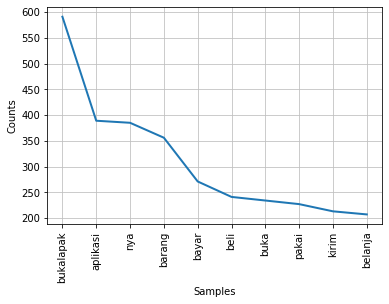

In [46]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [47]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual...","[sistem, nya, parah, seller, ecek, jual, masuk...",sistem nya parah seller ecek jual masuk ecek a...,0
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update...","[langgan, setia, guna, bukalapak, update, vers...",langgan setia guna bukalapak update versi anya...,0
...,...,...,...,...,...,...,...,...,...,...
1295,Asusnew898 Oke,5,2022-12-09 05:30:58,tolong saya pake pay later beli barang keteran...,"[tolong, saya, pake, pay, later, beli, barang,...","[tolong, saya, pakai, pay, later, beli, barang...","[tolong, pakai, pay, later, beli, barang, kete...","[tolong, pakai, pay, later, beli, barang, tera...",tolong pakai pay later beli barang terang jnt ...,1
1296,java coil,1,2022-08-06 01:31:12,menu live chat nya mana oi banyak yg bingung b...,"[menu, live, chat, nya, mana, oi, banyak, yg, ...","[menu, live, chat, nya, mana, oi, banyak, yang...","[menu, live, chat, nya, oi, bingung, kesel, gu...","[menu, live, chat, nya, oi, bingung, kesel, gu...",menu live chat nya oi bingung kesel gua nyarinya,0
1297,Widi Yanwar,1,2022-08-21 16:18:31,aplikasi payah ketika ad msalah tidak bisa men...,"[aplikasi, payah, ketika, ad, msalah, tidak, b...","[aplikasi, payah, ketika, ada, masalah, tidak,...","[aplikasi, payah, menyelesaikan, merugikan, se...","[aplikasi, payah, selesai, rugi, belah, aplika...",aplikasi payah selesai rugi belah aplikasi buk...,0
1298,galung wicaksono,3,2022-08-11 00:32:39,agak bingung saat delive tidak ada rincian det...,"[agak, bingung, saat, delive, tidak, ada, rinc...","[sedikit, bingung, saat, delive, tidak, ada, r...","[bingung, delive, rincian, detail, no, resi, t...","[bingung, delive, rincian, detail, no, resi, t...",bingung delive rincian detail no resi tracking...,0


In [48]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value>0:
        return 'Positive'
    else:
        return 'Neutral'

In [49]:
from textblob import TextBlob


In [50]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)

name_dataframe['Month']=pd.DatetimeIndex(name_dataframe['Date']).month
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,Month
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral,12
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive,1
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0,0.00,0.00,Neutral,1
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual...","[sistem, nya, parah, seller, ecek, jual, masuk...",sistem nya parah seller ecek jual masuk ecek a...,0,-0.40,1.00,Negative,11
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update...","[langgan, setia, guna, bukalapak, update, vers...",langgan setia guna bukalapak update versi anya...,0,0.00,0.00,Neutral,11


Positive words


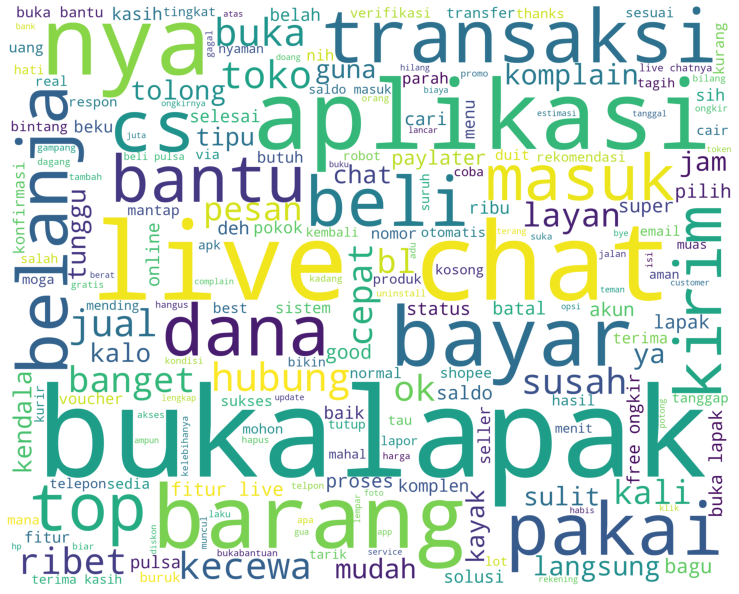

Negative words


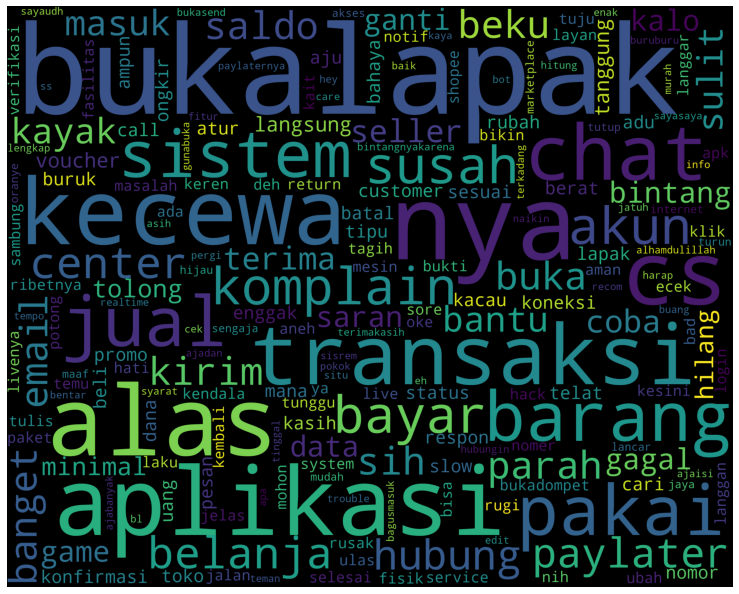

Neutral words


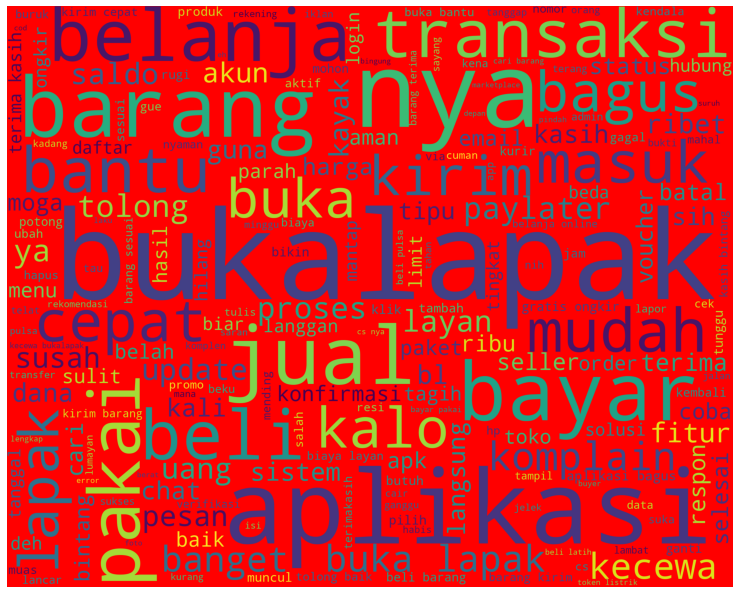

In [55]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'red')

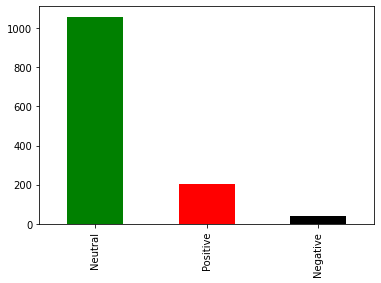

In [104]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [52]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
name_dataframe["label"].value_counts()

0    763
1    537
Name: label, dtype: int64

In [58]:
name_dataframe["Sentiment"].value_counts()

Neutral     1057
Positive     205
Negative      38
Name: Sentiment, dtype: int64

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [60]:
Ulasan = name_dataframe['Ulasan_clean']

In [61]:
Ulasan.isnull().sum()

0

In [62]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3316


In [63]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'sulit': 2896,
 'komplen': 1473,
 'bayar': 293,
 'paylater': 2203,
 'no': 2004,
 'watelpon': 3275,
 'susah': 2911,
 'aktif': 70,
 'membingunkan': 1808,
 'masuk': 1776,
 'aplikasi': 154,
 'parah': 2169,
 'belanja': 320,
 'cc': 582,
 'pilih': 2331,
 'klik': 1446,
 'cicil': 621,
 'tagih': 2932,
 'full': 983,
 'confirmasi': 640,
 'urus': 3208,
 'teman': 2991,
 'metode': 1860,
 'korban': 1503,
 'kabar': 1300,
 'bukalapak': 492,
 'jual': 1289,
 'nyaman': 2047,
 'konfirmasi': 1486,
 'pesan': 2312,
 'terima': 3010,
 'batal': 280,
 'mau': 1787,
 'beli': 324,
 'otomasi': 2127,
 'nya': 2031,
 'kerlambatan': 1417,
 'kirim': 1440,
 'lakh': 1563,
 'feedback': 953,
 'negatif': 1948,
 'salah': 2593,
 'toko': 3081,
 'bel': 316,
 'plin': 2355,
 'plan': 2343,
 'eh': 875,
 'sistem': 2832,
 'seller': 2711,
 'ecek': 858,
 'alas': 87,
 'koneksi': 1484,
 'internet': 1201,
 'masalah': 1766,
 'akses': 68,
 'marketplace': 1759,
 'hijau': 1117,
 'oranye': 2121,
 'lancar': 1578,
 'jaya': 1251,
 'komplain': 1470,


In [64]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 70)	1
  (0, 293)	2
  (0, 1473)	3
  (0, 1776)	1
  (0, 1808)	1
  (0, 2004)	1
  (0, 2203)	2
  (0, 2896)	1
  (0, 2911)	1
  (0, 3275)	1
  (1, 154)	1
  (1, 320)	2
  (1, 492)	1
  (1, 582)	1
  (1, 621)	2
  (1, 640)	1
  (1, 983)	1
  (1, 1300)	1
  (1, 1446)	1
  (1, 1503)	1
  (1, 1860)	1
  (1, 2169)	1
  (1, 2331)	1
  (1, 2932)	1
  (1, 2991)	1
  :	:
  (1297, 1594)	1
  (1297, 2200)	2
  (1297, 2573)	1
  (1297, 2707)	1
  (1298, 400)	1
  (1298, 709)	1
  (1298, 725)	1
  (1298, 2004)	1
  (1298, 2158)	1
  (1298, 2257)	1
  (1298, 2522)	1
  (1298, 2555)	1
  (1298, 2908)	1
  (1298, 3045)	1
  (1298, 3104)	1
  (1299, 61)	1
  (1299, 80)	1
  (1299, 237)	1
  (1299, 324)	2
  (1299, 566)	1
  (1299, 1589)	1
  (1299, 2514)	2
  (1299, 2655)	1
  (1299, 3090)	1
  (1299, 3093)	1


In [65]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

aplikasi parah belanja cc pilih klik cicil tagih full confirmasi urus teman belanja metode cicil korban kabar bukalapak


In [66]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 154)	1
  (0, 320)	2
  (0, 492)	1
  (0, 582)	1
  (0, 621)	2
  (0, 640)	1
  (0, 983)	1
  (0, 1300)	1
  (0, 1446)	1
  (0, 1503)	1
  (0, 1860)	1
  (0, 2169)	1
  (0, 2331)	1
  (0, 2932)	1
  (0, 2991)	1
  (0, 3208)	1


In [67]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.07227619 7.4777413  ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3208)	0.23538639611397116
  (0, 2991)	0.21797640771077345
  (0, 2932)	0.16942498844244736
  (0, 2331)	0.1818708656621121
  (0, 2169)	0.16781643758801865
  (0, 1860)	0.21797640771077345
  (0, 1503)	0.258547556002447
  (0, 1446)	0.18794502275955313
  (0, 1300)	0.2946530980511083
  (0, 983)	0.26734030986822477
  (0, 640)	0.2946530980511083
  (0, 621)	0.517095112004894
  (0, 582)	0.26734030986822477
  (0, 492)	0.08348921898242438
  (0, 320)	0.23918952206217134
  (0, 154)	0.09643360114260982


In [68]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "label"]]

In [69]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-69-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [70]:
data_label.to_excel("data_label.xlsx")

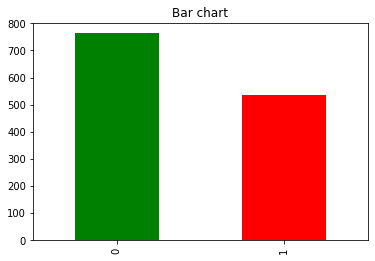

In [71]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

In [72]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment',
       'Month'],
      dtype='object')

In [73]:
from wordcloud import WordCloud

In [74]:
train_s0 = data_label[data_label["label"] == 0]

In [75]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-75-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [76]:
train_s0

,Nama pengguna,Ulasan_clean,label
0,Agroprobiotik Jawa Barat,sulit komplen bayar paylater no watelpon susah...,0
1,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,0
2,ferry kurniawan,jual nyaman konfirmasi pesan terima batal mau ...,0
3,Budiman Android16,sistem nya parah seller ecek jual masuk ecek a...,0
4,asep dadang sudjana,langgan setia guna bukalapak update versi anya...,0
...,...,...,...
1294,andri badoenks,turun bintang bayar pakai akulaku paylater pak...,0
1296,java coil,menu live chat nya oi bingung kesel gua nyarinya,0
1297,Widi Yanwar,aplikasi payah selesai rugi belah aplikasi buk...,0
1298,galung wicaksono,bingung delive rincian detail no resi tracking...,0


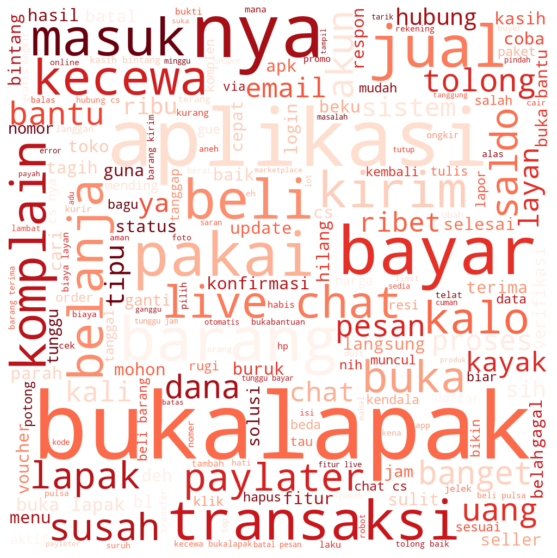

In [77]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [78]:
train_s1 = data_label[data_label["label"] == 1]

In [79]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-79-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [80]:
train_s1

,Nama pengguna,Ulasan_clean,label
12,Hadi Yanto,aplikasi rekomendasi banget deh pokok puas sen...,1
14,Mame Yai,toko langgan favorit barang pilih kadang baran...,1
16,Heru Santoso,lumayan cari aga susah kalo ketik merk barang ...,1
17,ACHIMNORTU (Minea),rekomendasi bayar link dana masalah bayar link...,1
20,Ulfa Mar'atus Solihah,edit ulas hubung customer care aplikasi kait b...,1
...,...,...,...
1288,serla Waty,barang terima kirim cepat rekomendasi seler ki...,1
1289,Asep Delivery Bdg,bantu cari barangsangat muas,1
1290,Arlek Amanca,belanja bl muas respon cepat metode bayar muda...,1
1293,Hasan Slank,mudah cepat proses nya,1


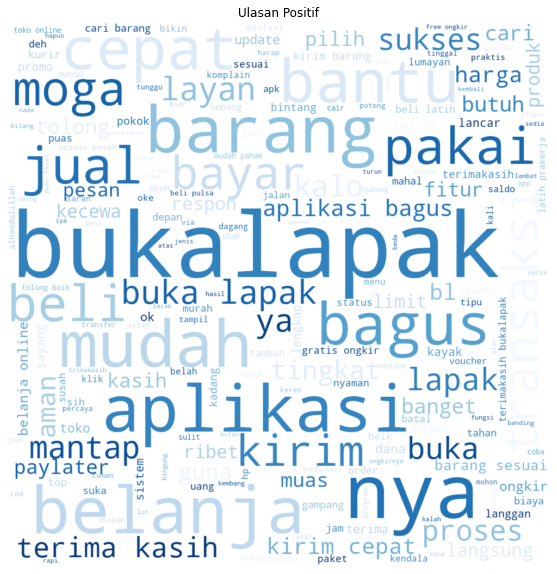

In [81]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [82]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-82-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

In [84]:
import numpy as np

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [86]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3050)
(130, 3050)


In [87]:
X_train = X_train.toarray()

In [88]:
X_test = X_test.toarray()

In [89]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0657933224657568}

In [91]:
nb = GaussianNB(var_smoothing=1.0)

In [92]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [93]:
y_pred_nb = nb.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [95]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[59 17]
 [ 7 47]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        76
           1       0.73      0.87      0.80        54

    accuracy                           0.82       130
   macro avg       0.81      0.82      0.81       130
weighted avg       0.83      0.82      0.82       130



In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [97]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [98]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [99]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [100]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        76
           1       0.92      0.65      0.76        54

    accuracy                           0.83       130
   macro avg       0.86      0.80      0.81       130
weighted avg       0.85      0.83      0.82       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        76
           1       0.91      0.59      0.72        54

    accuracy                           0.81       130
   macro avg       0.84      0.78      0.79       130
weighted avg       0.83      0.81      0.80       130

